# <center>   Model Devloppement
   

<img src="Downloads\car-price-prediction_Model-selection.png">

In [ ]:
!pip3 install xgboost

     -------------------------------------- 70.9/70.9 MB 379.6 kB/s eta 0:00:00


### In this part of our project we will,predict the price of house using multiple machine learning models, then evaluate each model and select the best. 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,PolynomialFeatures,StandardScaler


from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,\
VotingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from xgboost import XGBRegressor

from sklearn.metrics import f1_score,r2_score, mean_squared_error as mse, mean_absolute_error as mae,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_val_predict

from datetime import datetime

warnings.filterwarnings("ignore")

## 1-Data Preparation

In [2]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1000)
train_df=pd.read_csv("cars_price_prediction_22_features.csv")
train_df.drop(columns=["Unnamed: 0"],inplace=True)
train_df.head(5)

,OverallQual,GarageCars,FullBath,TotRmsAbvGrd,YearRemodAdd,SalePrice,BsmtQual,BsmtCond,ExterQual,Foundation,GarageFinish,HeatingQC,KitchenQual,BsmtFinType1,Condition2,HouseStyle,Exterior1st,Age,GrLivArea_m2,GarageArea_m2,TotalBsmt_m2,1stFlr_m2
0,7,2.0,2,8,2003,208500.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,20,158.864130,50.910844,79.524968,79.524968
1,6,2.0,2,6,1976,181500.0,Gd,TA,TA,CBlock,RFn,Ex,TA,ALQ,Norm,1Story,MetalSd,47,117.243586,42.735380,117.243586,117.243586
2,7,2.0,2,6,2002,223500.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,22,165.924758,56.485024,85.470760,85.470760
3,7,3.0,1,7,1970,140000.0,TA,Gd,TA,BrkTil,Unf,Gd,Gd,ALQ,Norm,2Story,Wd Sdng,108,159.514451,59.643726,70.234668,89.279783
4,8,3.0,2,9,2000,250000.0,Gd,TA,Gd,PConc,RFn,Ex,Gd,GLQ,Norm,2Story,VinylSd,23,204.200794,77.666908,106.373935,106.373935


In [4]:
data=pd.read_csv("House_price_prediction_No_Outliers.csv")
test_df=data[data["SalePrice"].isnull()]

test_df['Age']=datetime.now().year-test_df["YearBuilt"]

test_df[['GrLivArea_m2']]=test_df[['GrLivArea']]*0.092903
test_df[["GarageArea_m2"]]=test_df[["GarageArea"]]*0.092903
test_df[["TotalBsmt_m2"]]=test_df[["TotalBsmtSF"]]*0.092903
test_df[["1stFlr_m2"]]=test_df[["1stFlrSF"]]*0.092903

In [5]:
test_df=test_df[train_df.columns]
test_df.drop(columns=["SalePrice"],inplace=True)

In [6]:
df=pd.concat([train_df,test_df])

In [7]:
X=train_df.drop(columns="SalePrice")
numX=X.select_dtypes(exclude="object")
catX=X.select_dtypes(include="object")
numX



Y=train_df["SalePrice"]


In [8]:
encoder=LabelEncoder()
X_encoded_df = catX.apply(encoder.fit_transform)
encoded_train_df=pd.concat([X_encoded_df,numX],axis= 1)
X=encoded_train_df

### Feature encoding: (LabelEncoder)
encoding categorical data using LabelEncoder. 

In [8]:
# define predictor(X) and target(Y)

In [9]:
# Normalize the data
scaler=StandardScaler()
#X=scaler.fit_transform(X)

In [9]:
# define train and test data 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)


(922, 21) (922,) (396, 21) (396,)


## Model Devloppement

In [66]:
model_=[]
score=[]
RMSE=[]
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score.append(np.round(r2score,3))
    RMSE.append(np.sqrt(mse(y_test,predictions)))
    
     
    sns.distplot(y_test-predictions)      
          

Model is: LinearRegression()
Training score: 0.8638321469085585
Predictions are: [111751.81800637  97808.79154428 258401.2533752  200456.1890295
  49819.64313789]


r2 score is: 0.8650353624958188
MAE:684103803.8735116
MSE:684103803.8735116
RMSE:26155.378106108725


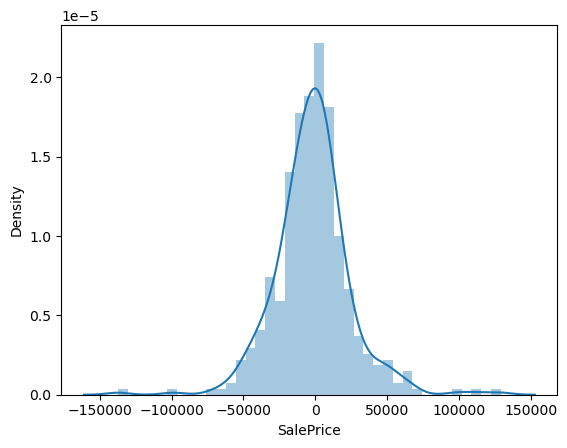

In [67]:
predict(LinearRegression())

Model is: Ridge()
Training score: 0.8638316420436507
Predictions are: [111722.4678475   97820.65677796 258369.89539026 200481.46224504
  49821.06622776]


r2 score is: 0.865011022512484
MAE:684227177.4882116
MSE:684227177.4882116
RMSE:26157.736474859816


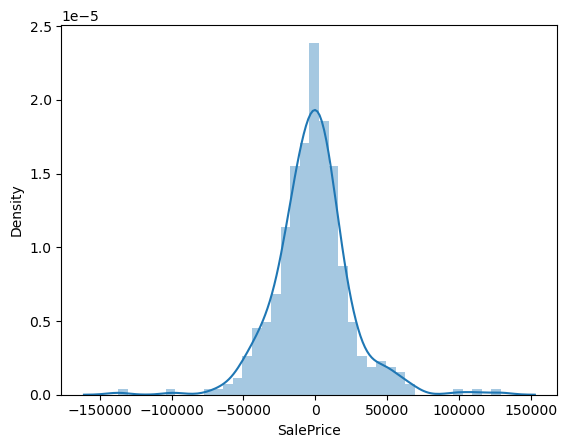

In [68]:
predict(Ridge())

Model is: DecisionTreeRegressor()
Training score: 0.9999124948747394
Predictions are: [114500.  93500. 260000. 202665.  68400.]


r2 score is: 0.7215121190196758
MAE:1411589155.7550504
MSE:1411589155.7550504
RMSE:37571.12130020942


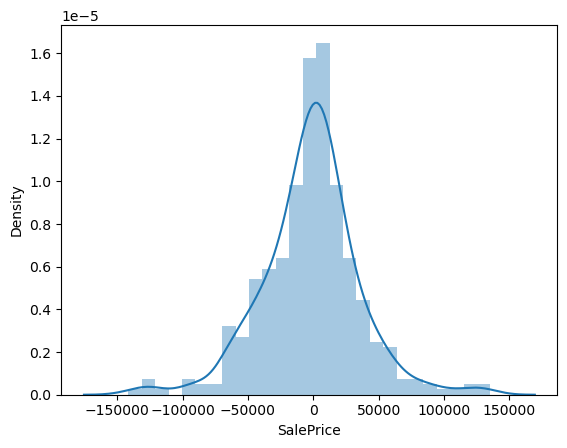

In [69]:
predict(DecisionTreeRegressor())

Model is: RandomForestRegressor()
Training score: 0.9799750483841452
Predictions are: [114940.   122017.74 245223.08 198435.41  80434.  ]


r2 score is: 0.8650579095056984
MAE:683989518.4168924
MSE:683989518.4168924
RMSE:26153.19327380296


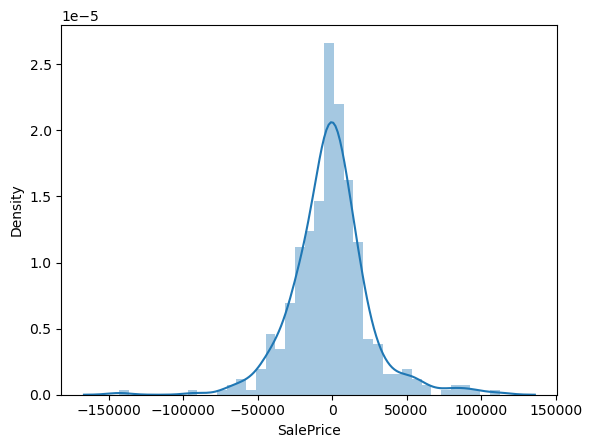

In [70]:
predict(RandomForestRegressor())

Model is: KNeighborsRegressor()
Training score: 0.8741708957799244
Predictions are: [129080.  116301.6 267830.  201383.   82900. ]


r2 score is: 0.8305625171620294
MAE:858838497.7851516
MSE:858838497.7851516
RMSE:29305.94645776095


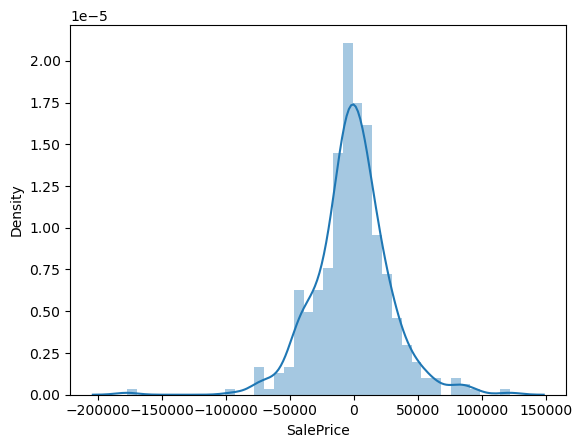

In [71]:
predict(KNeighborsRegressor())

Model is: SVC()
Training score: 0.01735357917570499
Predictions are: [140000. 140000. 140000. 140000. 140000.]


r2 score is: -0.2652421034430028
MAE:6413212762.931818
MSE:6413212762.931818
RMSE:80082.5371908996


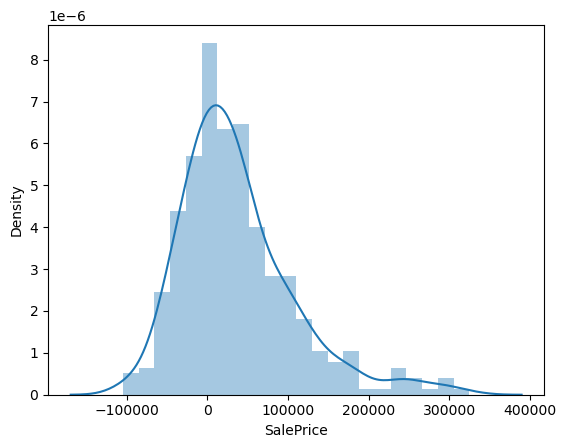

In [72]:
predict(svm.SVC())

Model is: GradientBoostingRegressor()
Training score: 0.942281395413765
Predictions are: [120946.78293601 116480.81781305 225659.76383433 192408.41659826
  63010.45284306]


r2 score is: 0.8819036350876365
MAE:598602522.5139387
MSE:598602522.5139387
RMSE:24466.354908607427


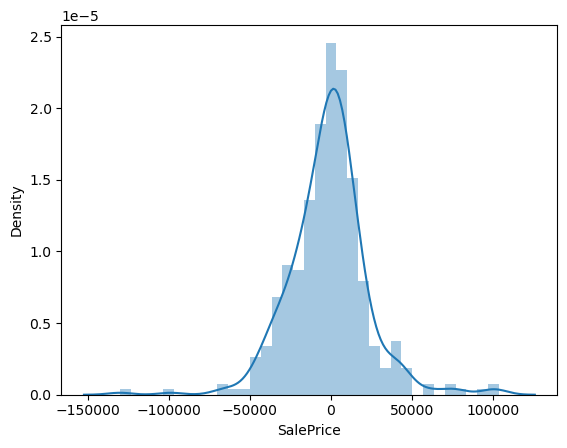

In [73]:
predict(GradientBoostingRegressor())

Model is: MLPRegressor()
Training score: 0.04500934301529147
Predictions are: [152543.29028012 149222.08870667 165370.73374982 159128.82590771
 146557.86503426]


r2 score is: 0.06455630958070957
MAE:4741542664.503409
MSE:4741542664.503409
RMSE:68858.86046474637


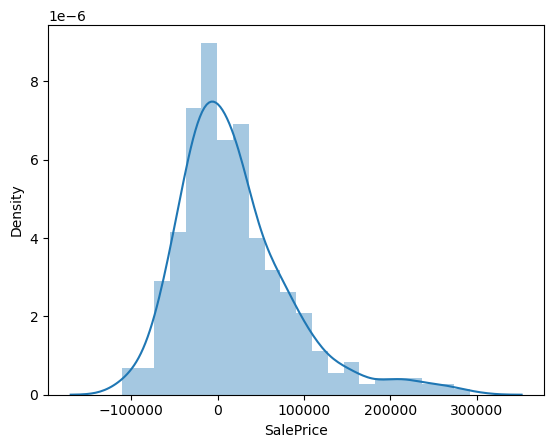

In [74]:
predict(MLPRegressor())

Model is: LogisticRegression()
Training score: 0.07049891540130152
Predictions are: [135000. 135000. 190000. 174000.  79000.]


r2 score is: 0.646521376112485
MAE:1791699482.628788
MSE:1791699482.628788
RMSE:42328.471300400015


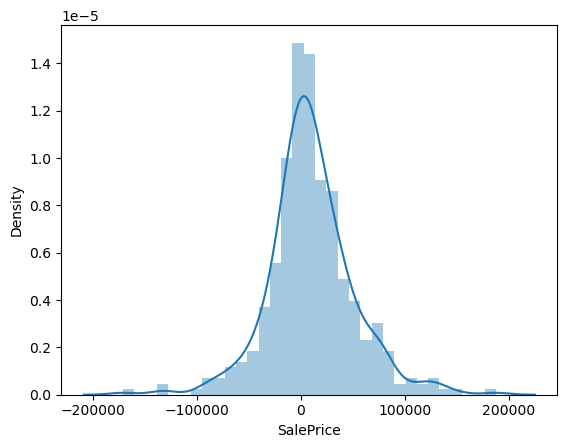

In [75]:
predict(LogisticRegression())

Model is: AdaBoostRegressor()
Training score: 0.8597130453265573
Predictions are: [116296.144      116296.144      237744.60869565 195133.41441441
 106449.49137931]


r2 score is: 0.8216212020420368
MAE:904159907.8843647
MSE:904159907.8843647
RMSE:30069.2518677197


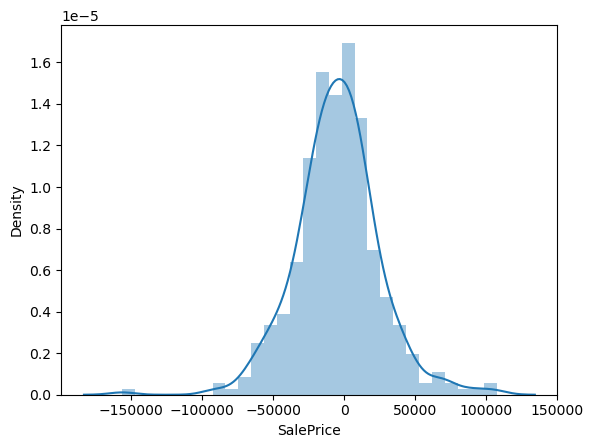

In [76]:
predict(AdaBoostRegressor())

Model is: ExtraTreesRegressor()
Training score: 0.9999124948747394
Predictions are: [116040.  117304.5 230229.2 202665.   80915. ]


r2 score is: 0.8555367409286655
MAE:732250068.4492471
MSE:732250068.4492471
RMSE:27060.119520232114


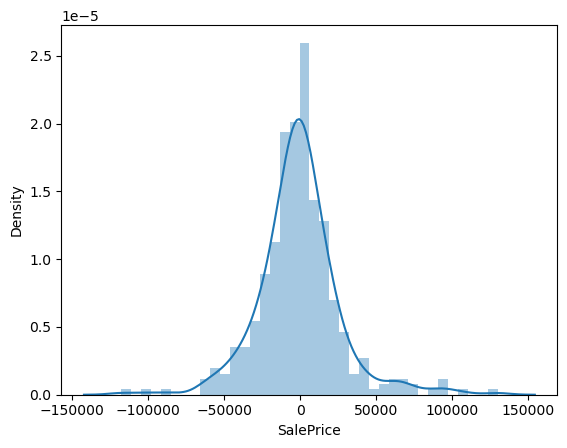

In [77]:
predict(ExtraTreesRegressor())

Model is: HistGradientBoostingRegressor()
Training score: 0.9785899949357562
Predictions are: [125699.50491386 119647.44851962 224382.00677624 196143.13175927
  69108.21081395]


r2 score is: 0.8684234001891409
MAE:666930642.6919638
MSE:666930642.6919638
RMSE:25825.000342535597


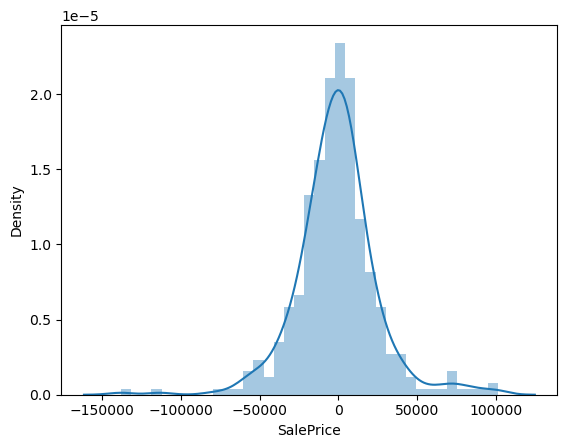

In [57]:
predict(HistGradientBoostingRegressor())

## XGBRegressor

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.9994921689879737
Predictions are: [112412.05 116587.85 234468.12 197763.22  68887.04]


r2 score is: 0.8463761755815049
MAE:778682806.0574989
MSE:778682806.0574989
RMSE:27904.888569164705


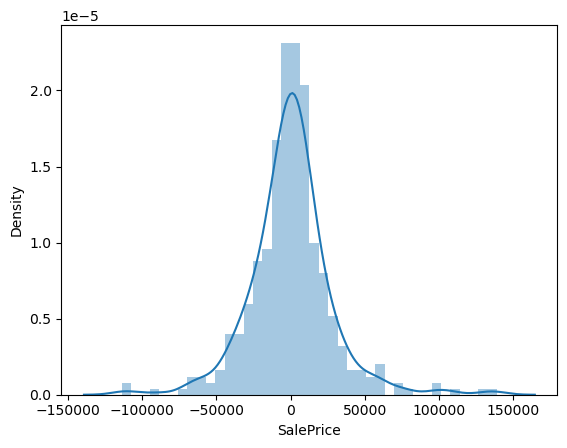

In [78]:
predict(XGBRegressor())

In [59]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
model_score["RMSE"]=RMSE
Top5Scors=model_score.sort_values(by="Score",ascending=False)#.head(5)
print("The best 5 models are:")
Top5Scors

The best 5 models are:


,Model,Score,RMSE
6,GradientBoostingRegressor,0.882,24437.442015
11,HistGradientBoostingRegressor,0.868,25825.000343
0,LinearRegression,0.865,26155.378106
1,Ridge,0.865,26157.736475
3,RandomForestRegressor,0.865,26159.925990
10,ExtraTreesRegressor,0.854,27167.663140
4,KNeighborsRegressor,0.831,29305.946458
9,AdaBoostRegressor,0.808,31231.523224
2,DecisionTreeRegressor,0.737,36480.650698
8,LogisticRegression,0.647,42328.471300


## Hypertuning Models

### GradientBoostingRegressor

In [44]:
GBR=GradientBoostingRegressor()

In [45]:
# Parameters:
para={
     "loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
     "learning_rate":[0.1,0.2,0.3,0.5,0.01,0.001],
     "n_estimators":[100,200,250,300,350],
     "criterion" : ['friedman_mse', 'squared_error'],
     "max_features" : ['auto', 'sqrt', 'log2'],
     "max_depth": [3, 5, 7,9],
     'subsample': [0.5,0.6,0.7,0.8, 0.9, 1.0],
     'alpha':[0.7,0.8,0.9]    
     }

In [48]:
gs_3cv=GridSearchCV(GBR,param_grid=para,n_jobs=-1,cv=3)
rgs_3cv=RandomizedSearchCV(estimator=GBR, param_distributions=para,n_jobs=-1,
                           n_iter=20, cv=4, scoring='neg_mean_squared_error')

Model is: RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'alpha': [0.7, 0.8, 0.9],
                                        'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.5,
                                                          0.01, 0.001],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 250, 300,
                                        

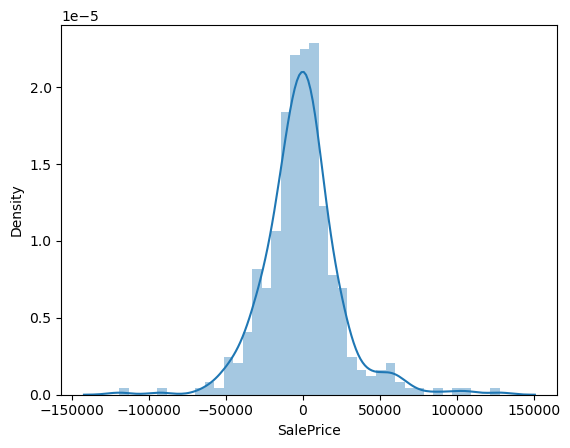

In [49]:
predict(rgs_3cv)

In [50]:
rgs_3cv.best_params_

{'subsample': 0.6,
 'n_estimators': 350,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'absolute_error',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse',
 'alpha': 0.9}

In [ ]:
rgs_3cv_best_params_={'subsample': 0.9,
 'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 3,
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [59]:
gbr=GradientBoostingRegressor(subsample=0.9,
 n_estimators=200,
 max_features='log2',
 max_depth=3,
 loss='squared_error',
 learning_rate=0.1,
 criterion='friedman_mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
prediction=gbr.predict(x_test)
r2_score(y_test,prediction)
f1_score(y_test,prediction)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [81]:
gs_2cv=GridSearchCV(GBR,param_grid=para,cv=2)
rgs_2cv=RandomizedSearchCV(estimator=GBR, param_distributions=para,n_jobs=-1,
                           n_iter=10, cv=2, scoring='neg_mean_squared_error')

Model is: RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.2, 0.01,
                                                          0.001],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error')
Training score: -196449654.50

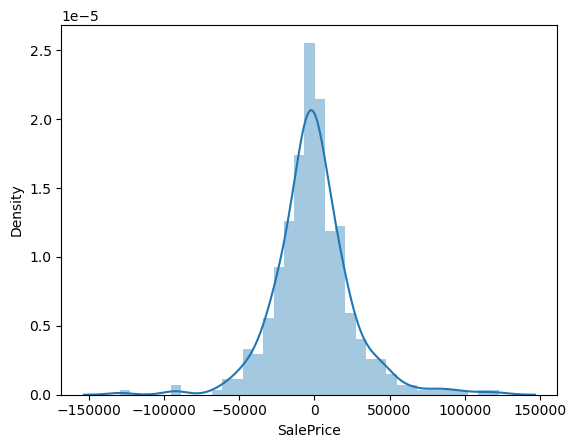

In [82]:
predict(rgs_2cv)

In [88]:
rgs_2cv.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 5,
 'loss': 'absolute_error',
 'learning_rate': 0.2,
 'criterion': 'friedman_mse'}

In [31]:
lr=LinearRegression()
para={"n_jobs":[-1,1],
     "positive":[True,False]}
#gs_lr=GridSearchCV(lr,param_grid=para,cv=3)
rgs_lr=RandomizedSearchCV(estimator=lr, param_distributions=para,n_jobs=-1,
                           n_iter=20, cv=3, scoring='r2')

Model is: RandomizedSearchCV(cv=3, estimator=LinearRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'n_jobs': [-1, 1],
                                        'positive': [True, False]},
                   scoring='r2')
Training score: 0.8638321469085585
Predictions are: [111751.81800637  97808.79154428 258401.2533752  200456.1890295
  49819.64313789]


r2 score is: 0.8650353624958188
MAE:684103803.8735116
MSE:684103803.8735116
RMSE:26155.378106108725


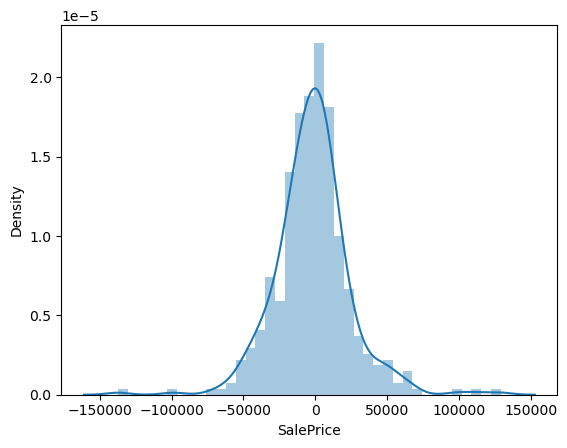

In [32]:
predict(rgs_lr)

In [94]:
sklearn.metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [33]:
gs_lr.best_params_

{'n_jobs': None, 'positive': False}

## Ridge 

In [33]:
rr=Ridge()
param={"alpha":[10,1,0.1,0.001,0.0001],
      "solver":['auto', 'svd', 'cholesky','lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
     "random_state":range(1,100,10),
      "tol":[0.001,0.0001,0.00001]}
sg_rr=GridSearchCV(rr,param_grid=param,cv=3)
rsg_rr=RandomizedSearchCV(estimator=rr, param_distributions=param,n_jobs=-1,
                           n_iter=20, cv=3, scoring='r2')

Model is: RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [10, 1, 0.1, 0.001, 0.0001],
                                        'random_state': range(1, 100, 10),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   scoring='r2')
Training score: 0.8631937729070756
Predictions are: [110339.80376748  98046.15866323 257466.50935234 201218.163071
  49724.44470393]


r2 score is: 0.8640176990526383
MAE:689262099.0048659
MSE:689262099.0048659
RMSE:26253.80161052616


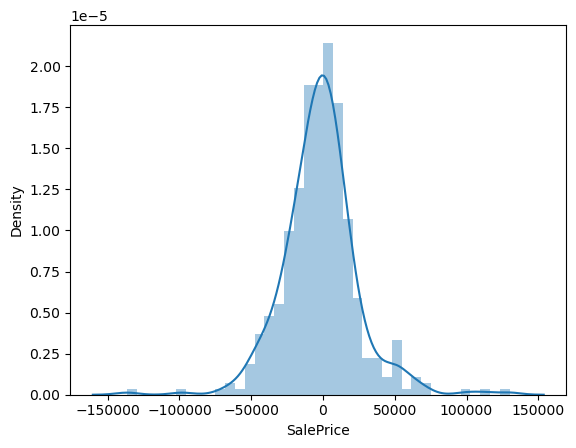

In [34]:
predict(rsg_rr)

In [36]:
sg_rr.best_params_

{'alpha': 1, 'random_state': 71, 'solver': 'sag', 'tol': 0.0001}

## 	Hist Gradient Boosting Regressor	

In [41]:
hgbr=HistGradientBoostingRegressor()
param={"learning_rate":[0,0.2,0.5,0.8,1],
       "loss":['squared_error', 'absolute_error', 'poisson', 'quantile'],
      "l2_regularization":[0,0.1,0.5,1,5,10]}
sg_hgbr=GridSearchCV(hgbr,param_grid=param,cv=4)
rsg_hgbr=RandomizedSearchCV(estimator=hgbr, param_distributions=param,n_jobs=-1,
                           n_iter=20, cv=3, scoring='r2')

Model is: RandomizedSearchCV(cv=3, estimator=HistGradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 0.1, 0.5, 1, 5,
                                                              10],
                                        'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'poisson',
                                                 'quantile']},
                   scoring='r2')
Training score: 0.9458950538797211
Predictions are: [116192.58464952 112883.68082785 241162.39788443 194200.22548126
  69100.20759723]


r2 score is: 0.868000914327767
MAE:669072123.5286732
MSE:669072123.5286732
RMSE:25866.42850353858


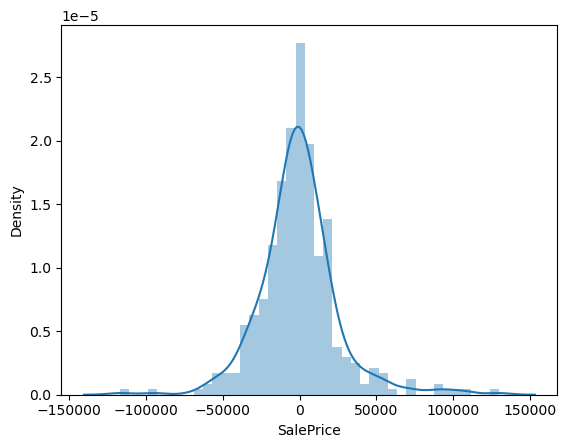

In [42]:
predict(rsg_hgbr)

In [38]:
rsg_hgbr.best_params_

{'loss': 'absolute_error', 'learning_rate': 0.2, 'l2_regularization': 0.5}

## Lasso Regressor

In [111]:
lss=Lasso()
param={"alpha":[0.001,0.01,0.1,1,10],
 "selection" : ['cyclic', 'random']}
sg_lss=GridSearchCV(lss,param_grid=param,cv=3)
rsg_lss=RandomizedSearchCV(estimator=lss, param_distributions=param,n_jobs=-1,
                           n_iter=20, cv=5, scoring='r2')

Model is: RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'selection': ['cyclic', 'random']},
                   scoring='r2')
Training score: 0.8638305338911128
Predictions are: [111760.24275802  97859.44600662 258381.59751327 200489.00140016
  49800.22231841]


r2 score is: 0.8650152077230356
MAE:684205963.6464871
MSE:684205963.6464871
RMSE:26157.330973294793


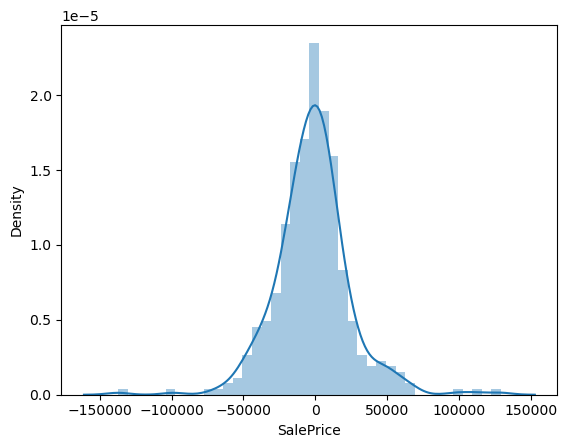

In [112]:
predict(rsg_lss)

In [46]:
sg_l.best_params_

{'alpha': 10, 'selection': 'cyclic'}

## Polynomial Features-Ridge

In [52]:
from sklearn.pipeline import make_pipeline


# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(), Lasso(alpha=10,selection='cyclic'))

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6),
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

In [53]:
# Evaluate the performance of the best model
#mse_ = mse(y_test, y_pred)
#rmse = np.sqrt(mse_)
print("Best hyperparameters:", best_params)
#print("RMSE:", rmse)

Best hyperparameters: {'polynomialfeatures__degree': 1}


In [54]:
r2_score(y_test, y_pred)

0.8710861136407259

## Polynomial Features-Linear Regression

In [83]:

# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6)
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
print("Best hyperparameters:", best_params)
print("R2_score:",np.round(r2_score(y_test, y_pred),3) )

mse_ = mse(y_test, y_pred)
rmse = np.sqrt(mse_)
print("RMSE:",rmse)


Best hyperparameters: {'polynomialfeatures__degree': 1}
R2_score: 0.871


TypeError: 'numpy.float64' object is not callable

In [ ]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False)
print("The best 5 models are:")
Top5Scors

### lets strandardize our data and see the results :

In [40]:
X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [41]:
models=[gs_3cv,gs_lr,sg_rr,sg_hgbr]

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9341674128377749
Predictions are: [122722.19878194 124012.54279446 236771.58751123 188293.73186742
  55452.84602743]


r2 score is: 0.8717412128173209
MAE:650113435.7446464
MSE:650113435.7446464
RMSE:25497.322128895154
Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8747420732548989
Predictions are: [114916.5 106468.5 254820.5 194148.5  39140.5]


r2 score is: -9.290539526131538e+24
MAE:4.709154595896943e+34
MSE:4.709154595896943e+34
RMSE:

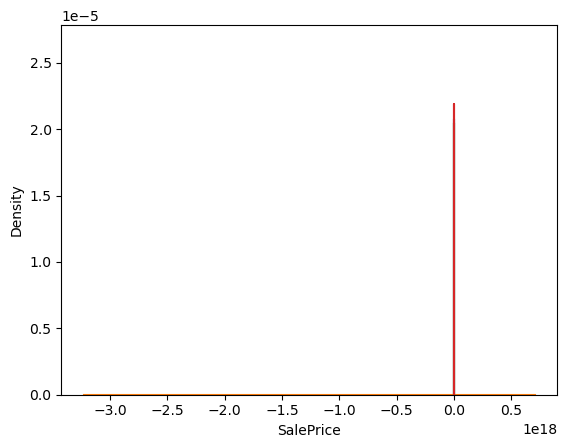

In [42]:
for mdl in models:
    predict(mdl)
    